In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('IPL_2021_tweets.csv')
len(df1)

C:\Users\MANDURX\AppData\Local\Temp\ipykernel_40664\4038626405.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('IPL_2021_tweets.csv')


252399

In [4]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,The Cricket Digest,Australia,The Cricket Digest,8/9/2021 4:31,3.0,77,0,FALSE,8/26/2021 23:58,There have been notable exclusions from IPL pr...,"['IPL2021', 'IPL']",Twitter for iPhone,False
1,Sportstar,NaN,India's No. 1 sports magazine\n\nFacebook: htt...,8/28/2015 6:22,29653.0,410,846,TRUE,8/26/2021 22:30,"#CSK batsman Faf du Plessis, who had a terrifi...","['CSK', 'IPL2021']",TweetDeck,False
2,CRICKETEER UPDATES 🎉🎊🏏,"Cardiff, Wales","Researcher, Welsh, Cricket Analyst , Sports Pr...",10/27/2020 18:04,403.0,323,3072,FALSE,8/26/2021 22:25,England 1st innings lead is already 345 Stumps...,"['jamesanderson', 'jimmyanderson', 'joeroot', ...",Twitter for iPhone,False
3,The Niche Cache,"South Auckland, New Zealand",We love sports and music and other shit. https...,6/3/2013 2:07,2047.0,1547,3488,FALSE,8/26/2021 22:18,Kiwi #IPL2021 crew for the re-jigged comp...\n...,"['IPL2021', 'Blackcaps']",Twitter Web App,False
4,The Cricketer,"London, England",The world’s No.1 cricket magazine and organise...,4/2/2009 15:34,149893.0,2198,6564,TRUE,8/26/2021 22:00,Adil Rashid will play in the IPL after signing...,['IPL2021'],Twitter Web App,False


In [5]:
df1.isna().sum()

user_name              17
user_location       73521
user_description    31381
user_created            6
user_followers          7
user_friends            7
user_favourites         7
user_verified           7
date                    7
text                    7
hashtags            21150
source                 78
is_retweet             12
dtype: int64

In [6]:
df_clean = df1.dropna()
df_clean.isna().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64

C:\Users\MANDURX\AppData\Local\Temp\ipykernel_40664\1341774477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = pd.to_datetime(df_clean['date'],format='mixed')


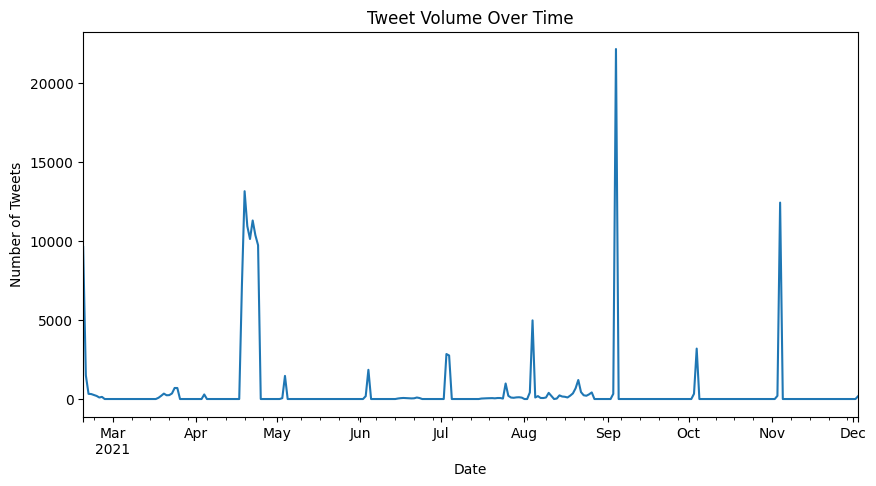

In [8]:

# Convert the date column to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'],format='mixed')

# Resample to get counts per day
tweets_per_day = df_clean.set_index('date').resample('D').count()

# Plot
tweets_per_day['text'].plot(figsize=(10, 5), title='Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

C:\Users\MANDURX\AppData\Local\Temp\ipykernel_40664\1026475222.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment'] = df_clean['text'].apply(get_tweet_sentiment)


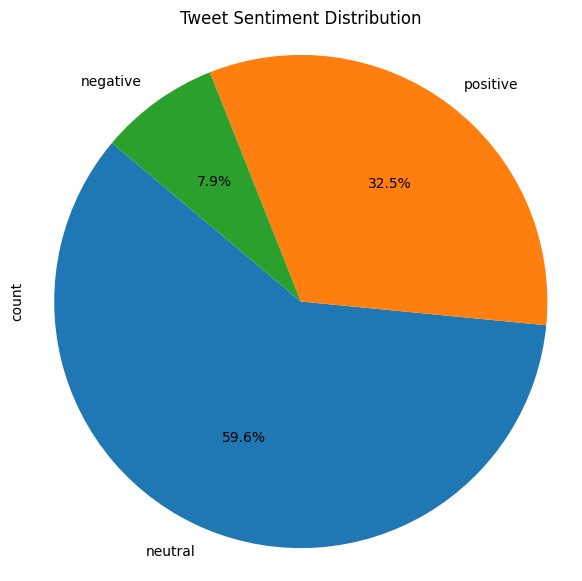

In [9]:
# Define a function to calculate sentiment
def get_tweet_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Calculate sentiment for each tweet
df_clean['sentiment'] = df_clean['text'].apply(get_tweet_sentiment)

# Count the values of each sentiment
sentiment_counts = df_clean['sentiment'].value_counts()

# Plot
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(7, 7), title='Tweet Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

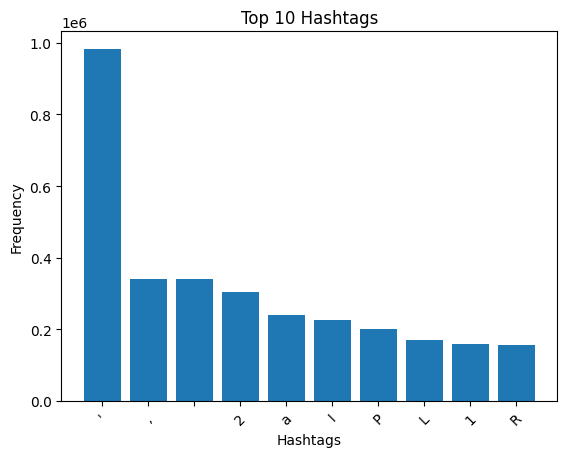

In [10]:
from collections import Counter

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for sublist in df_clean['hashtags'].dropna() for hashtag in sublist]
hashtag_freq = Counter(all_hashtags)

# Most common hashtags
most_common_hashtags = hashtag_freq.most_common(10)
hashtag_names = [hashtag[0] for hashtag in most_common_hashtags]
hashtag_counts = [hashtag[1] for hashtag in most_common_hashtags]

# Plot
plt.bar(hashtag_names, hashtag_counts)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 10 Hashtags')
plt.show()


C:\Users\MANDURX\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MANDURX\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MANDURX\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


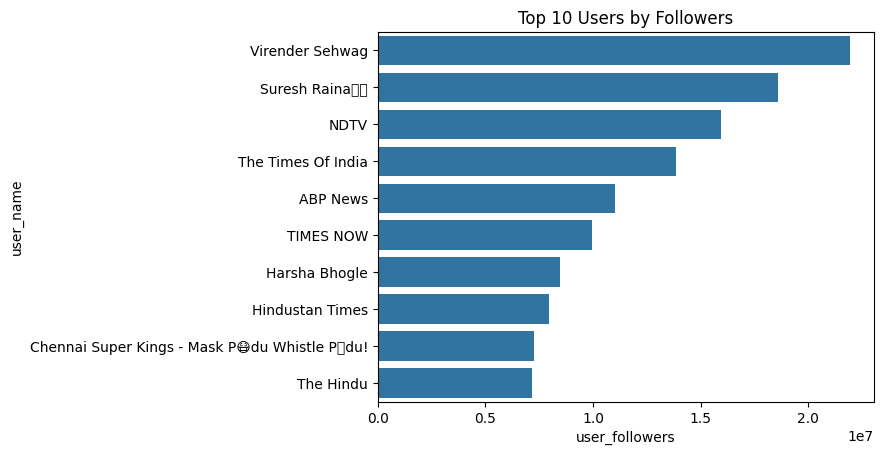

In [11]:
# Assuming that 'user_followers' and 'user_friends' are numeric already
# Get top 10 users by follower count
top_users_by_followers = df_clean.sort_values(by='user_followers', ascending=False).drop_duplicates(subset='user_name').head(10)

# Plot
sns.barplot(x='user_followers', y='user_name', data=top_users_by_followers)
plt.title('Top 10 Users by Followers')
plt.show()

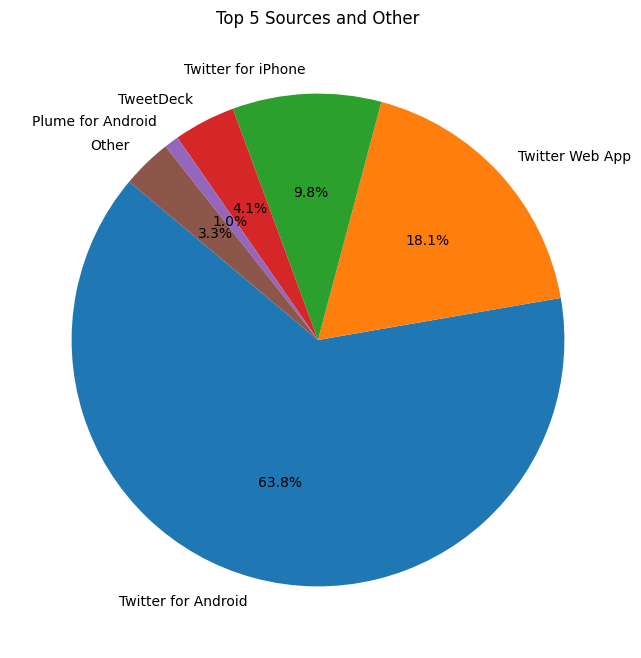

In [12]:
# Count the sources and sort them
source_counts = df_clean['source'].value_counts().sort_values(ascending=False)

# Separate the top 5 sources
top_sources = source_counts.head(5)

# Sum the rest
others = source_counts[5:].sum()

# Append the sum of others to the top_sources Series
top_sources['Other'] = others

# Plot
top_sources.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Top 5 Sources and Other')
plt.ylabel('')  # Hide the 'source' ylabel
plt.show()
